Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [50]:
NICKNAME = ""

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [51]:
def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    return (-3*f(x)+4*f(x + h)-f(x + 2 * h))/ (2 * h)

#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [52]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


При уменьшении шага погрешность уменьшатся согласно $\cfrac{du}{dx} = \cfrac{-3u(x) + 4u(x+h) - u(x+2h)}{2h} + O(h^2)$

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [53]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

c:\Users\Xiaomi\source\repos\PytHSEPr\PytHSEPr\HSE_inv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


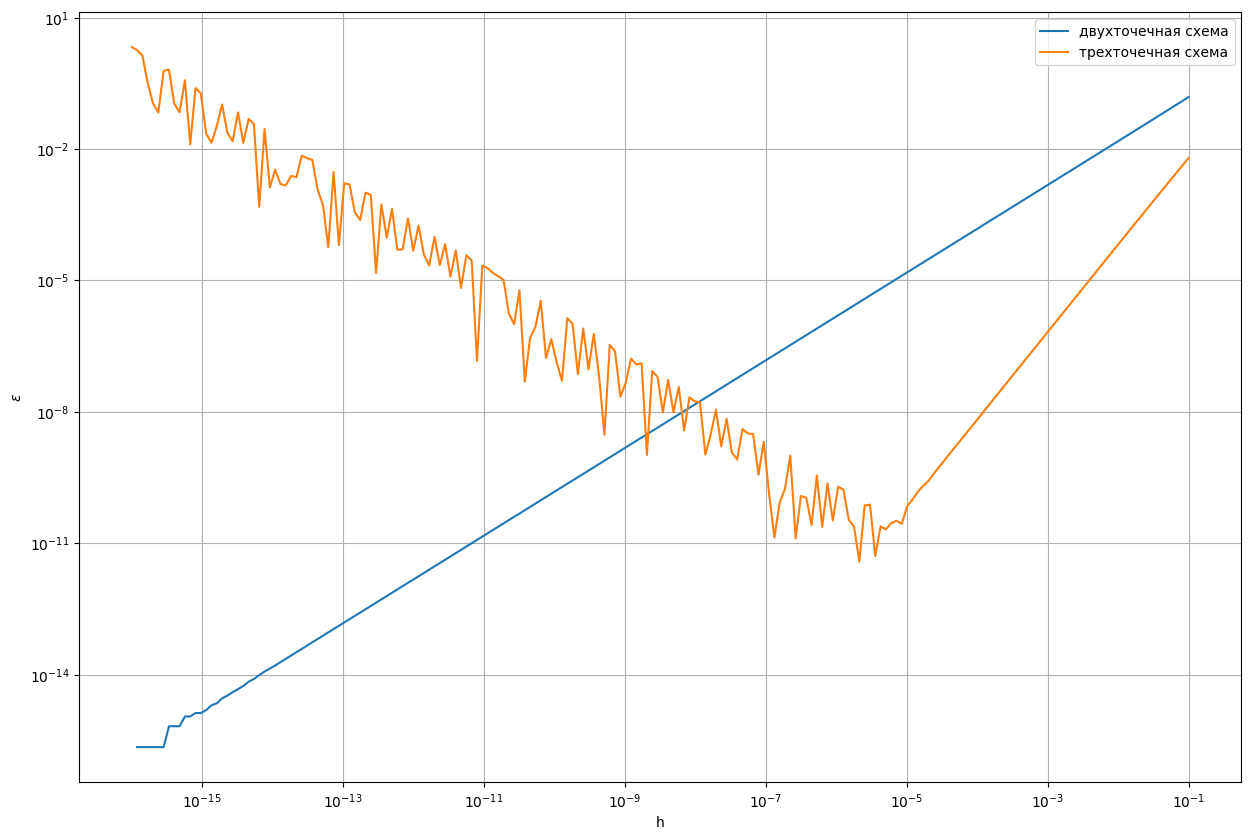

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x = 1
h_space = np.logspace(-16, -1, num = 200)
diff = (np.array([[abs((f(x+i) - f(x))/(float(x+i) - x) - fder(x)),abs(deriv(f, x, i) - fder(x))] for i in h_space])).transpose()


plt.figure(figsize=(15, 10))
plt.loglog(h_space, diff[0], '-', label='двухточечная схема')
plt.loglog(h_space, diff[1], '-', label='трехточечная схема')
plt.xlabel('h')
plt.ylabel('$\\varepsilon$')
plt.legend()
plt.grid()
plt.show()



### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [75]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


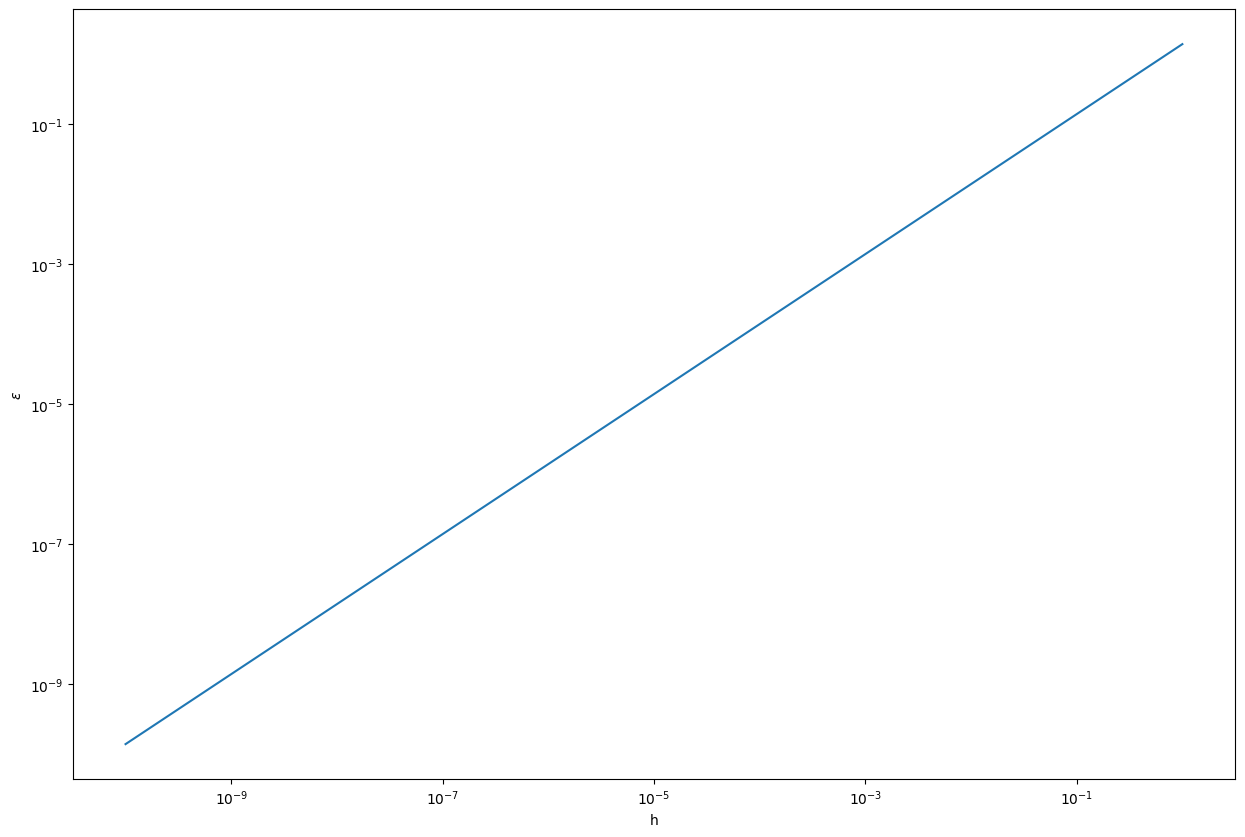

In [76]:
h_space = np.logspace(-10, 0, num = 200)
arr = [(abs(f(0) - deriv(f, 0, i))) for i in h_space]

plt.figure(figsize=(15, 10))
plt.loglog(h_space, arr, '-')
plt.xlabel('h')
plt.ylabel('$\\varepsilon$')
plt.show()


YOUR ANSWER HERE

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [82]:
def midpoint_rule(f, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    def i(a, b, n):
            d = (b - a) / n
            return np.sum(np.array([d * f(a + (j + 0.5) * d) for j in range(n)]))

    n = int((b - a) / eps ** 0.5)
    i1 = i(a,b,n)
    while True: 
        i2 = i(a,b,2 * n)
        if abs(i2 - i1) < eps:
            return i2, n * 2 
        i1 = i2 
        n *= 2

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


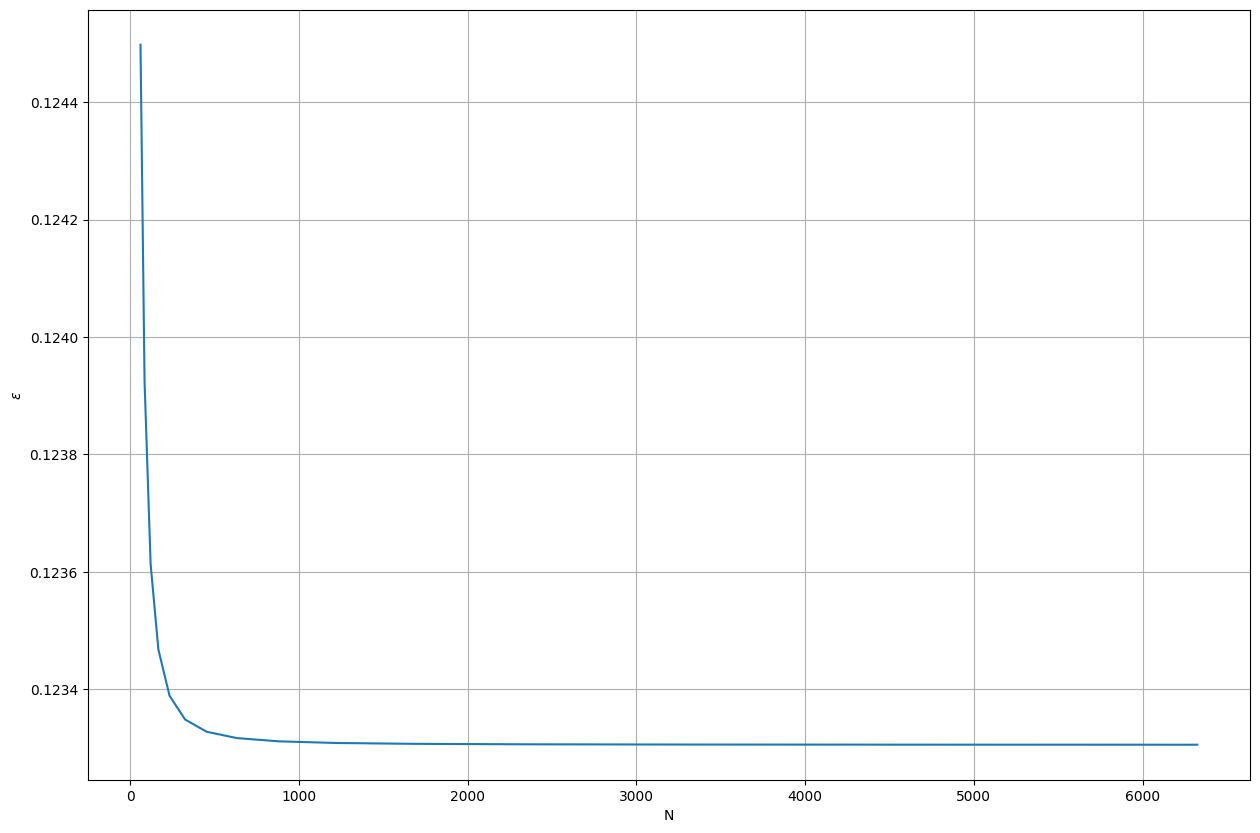

Настоящее решение = : -0.961579839896664
Численное решение интеграла при eps = 1e-05: -1.0848857233942824
Ошибка интеграла при eps = 1e-05: 0.1233058834976184


In [116]:
f = lambda x: np.exp(x*0.2)* np.sin(x)
sol = lambda x: -5/26 * np.exp(x)*(5*np.cos(x) - np.sin(x))
a, b = -10, 0
True_solution = sol(b) - sol(a)

epsList = np.logspace(-5, -1, num = 15)
nList = []
diffList = []
for e in epsList:
    I, N = midpoint_rule(f, a, b, e)
    diffList.append(abs(I - True_solution))
    nList.append(N)

plt.figure(figsize=(15, 10))
plt.plot(nList, diffList, '-', label="График ошибки")
plt.xlabel("N")
plt.ylabel("$\\varepsilon$")
plt.grid(True)
plt.show()

eps = 1e-5
I, N = midpoint_rule(f, a, b, eps)
print(f"Настоящее решение = :", True_solution)
print(f"Численное решение интеграла при eps = {eps}:", I)
print(f"Ошибка интеграла при eps = {eps}:", abs(I - True_solution))

Ошибка попала в требуемый иетрвал, но если взять интеравл на $x \in \mathbb {R}_+ $, то сходимость ошибки резко упадет, такое свойство у выбранной мной функции, компьютерные методы не спобны ее взять точно.

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [ ]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
